In [107]:
from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np
import sys
import tensorflow as tf

In [108]:
seed=0
np.random.seed(seed)
tf.set_random_seed(seed)

In [110]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print('학습셋 이미지 수 : %d 개' % (X_train.shape[0]))
print('테스트셋 이미지 수 : %d 개' % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


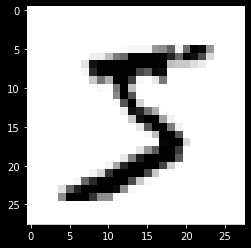

In [114]:
#X_train의 0번째 숫자 표시
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [118]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)    #stdout은 표준출력을 뜻한다.
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [120]:
#차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784)   #784개의 1차원 배열로 바꿔준다
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test=X_test.reshape(X_test.shape[0], 784).astype('float')

print('class : %d' % (Y_class_train[0]))   #클래스 값 확인

class : 5


In [122]:
#바이너리화 과정
Y_train=np_utils.to_categorical(Y_class_train, 10)  #클래스 정수들을 바이너리 클래스 메트릭스로 변환
Y_test=np_utils.to_categorical(Y_class_test, 10)

print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [150]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import os

In [126]:
#seed값 설정 (랜덤 순서가 같아지것을 막기위해 사용한다. seed값을 매번 다르게 설정)
seed=0
np.random.seed(seed)
tf.set_random_seed(seed)

In [129]:
#MNIST 불러오기
(X_trian, Y_train), (X_test, Y_test)= mnist.load_data()

X_train=X_train.reshape(X_train.shape[0], 784).astype('float')
X_test= X_test.reshape(X_test.shape[0], 784).astype('float')

Y_train=np_utils.to_categorical(Y_train, 10)
Y_test=np_utils.to_categorical(Y_test, 10)

In [133]:
#모델 프레임 설정
model=Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))      #add를 사용하여 레이어추가 입력에대한 정보 받는역할
model.add(Dense(10, activation='softmax'))                   #softmax = 0 or 1

In [134]:
#모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',      #0 or 1
             optimizer='adam',                      #adam형식으로 업데이트
             metrics=['accuracy'])                  #훈련과 테스트 모니터링

In [156]:
history=model.fit(X_train, Y_train, validation_data=(X_test,Y_test),
                 epochs=30, batch_size=200, verbose=0)

#validation data: 검증데이터에서 성능 모니터링
#epoch: 전체입력데이터를 순회하는 횟수
#batch_size: 배치의 크기를 지정

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [170]:
print('n\ Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 1s 64us/step
n\ Test Accuracy: 0.9368


In [159]:
#테스트셋의 오차
y_vloss=history.history['val_loss']

[4.846711535453796,
 3.883417932987213,
 3.7886737990379333,
 3.512183434963226,
 3.300985972881317,
 3.0898389482498168,
 2.8867509841918944,
 2.7514873480796815,
 2.5772993534803392,
 2.4467269515991212,
 2.317782137989998,
 2.179166536480188,
 2.1501539655029775,
 1.9325596632063389,
 1.8487455715239047,
 1.7794379989802838,
 1.611809583455324,
 1.5940796683728695,
 1.489312055259943,
 1.4103338198363782,
 1.3306960473954677,
 1.2878358559310437,
 1.254047177284956,
 1.2160678060352803,
 1.1701737686991691,
 1.1089250043034553,
 1.0704688531160356,
 1.0439017558097838,
 1.0460644394159317,
 1.0186636666953564]

In [160]:
#학습셋의 오차
y_loss=history.history['loss']

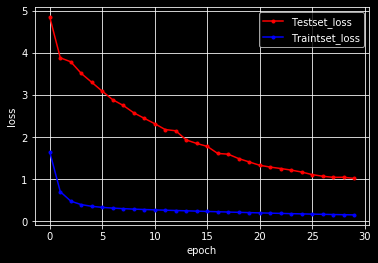

In [164]:
x_len=np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Traintset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()